<a href="https://colab.research.google.com/github/Fabioaugustmp/ml-politicas-energeticas-ifg-2025/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Célula de Código 1: Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Após executar, verifique se a pasta do seu projeto aparece na aba de arquivos à esquerda.
# O caminho para seus dados será algo como: '/content/drive/MyDrive/Projeto_ONS_Goias/dados/'

Mounted at /content/drive


In [2]:
# Célula de Código 2: Instalar bibliotecas geoespaciais
!pip install pandas geopandas matplotlib seaborn

In [6]:
# Célula de Código 3: Carregar e Inspecionar Dados da ANEEL
import pandas as pd

# ATENÇÃO: Ajuste o caminho abaixo para corresponder exatamente ao nome do seu arquivo!
caminho_aneel = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/ANEEL-SIGA-SISTEMAS-DE-INFORMAÇÃO-GERAÇÃO/siga-empreendimentos-geracao.csv'

# Carregar o dataset. O 'encoding' e 'sep' são importantes para arquivos do governo brasileiro.
df_usinas_brasil = pd.read_csv(caminho_aneel, encoding='ISO-8859-1', sep=';')

# 1. Visualizar as 5 primeiras linhas para entender a estrutura
print("### Amostra dos Dados ###")
print(df_usinas_brasil.head())

# 2. Obter informações sobre as colunas e tipos de dados
print("\n### Informações Gerais (Colunas e Tipos) ###")
df_usinas_brasil.info()

### Amostra dos Dados ###
  DatGeracaoConjuntoDados NomEmpreendimento  IdeNucleoCEG  \
0              2025-09-22                 E             8   
1              2025-09-22                 F             9   
2              2025-09-22                 G            10   
3              2025-09-22       14 de Julho            12   
4              2025-09-22            Abaúna            15   

                 CodCEG SigUFPrincipal SigTipoGeracao DscFaseUsina  \
0  PCH.PH.MG.000008-6.1             MG            PCH     Operação   
1  PCH.PH.MG.000009-4.1             MG            PCH     Operação   
2  PCH.PH.MG.000010-8.1             MG            PCH     Operação   
3  UHE.PH.RS.000012-4.1             RS            UHE     Operação   
4  CGH.PH.RS.000015-9.1             RS            CGH     Operação   

  DscOrigemCombustivel   DscFonteCombustivel DscTipoOutorga  ...  \
0              Hídrica  Potencial hidráulico    Autorização  ...   
1              Hídrica  Potencial hidráulico    Au

In [9]:
# Célula de Código 4: Limpeza e Filtragem
# Converter colunas de coordenadas para formato numérico, forçando erros a se tornarem 'NaN' (Not a Number)
# Note que a ANEEL usa vírgula como separador decimal, então precisamos substituí-la por ponto.
df_usinas_brasil['Latitude'] = df_usinas_brasil['NumCoordNEmpreendimento'].str.replace(',', '.', regex=False)
df_usinas_brasil['Longitude'] = df_usinas_brasil['NumCoordEEmpreendimento'].str.replace(',', '.', regex=False)

df_usinas_brasil['Latitude'] = pd.to_numeric(df_usinas_brasil['Latitude'], errors='coerce')
df_usinas_brasil['Longitude'] = pd.to_numeric(df_usinas_brasil['Longitude'], errors='coerce')

# Remover linhas onde as coordenadas são nulas (não podemos mapeá-las)
df_usinas_brasil.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Filtrar o DataFrame para conter apenas usinas de Goiás (GO)
df_usinas_goias = df_usinas_brasil[df_usinas_brasil['SigUFPrincipal'] == 'GO'].copy()

print(f"Encontramos {len(df_usinas_goias)} usinas com coordenadas válidas em Goiás.")
print("Amostra das usinas de Goiás:")
print(df_usinas_goias[['NomEmpreendimento', 'SigTipoGeracao', 'MdaGarantiaFisicaKw', 'Latitude', 'Longitude']].head())

Encontramos 288 usinas com coordenadas válidas em Goiás.
Amostra das usinas de Goiás:
     NomEmpreendimento SigTipoGeracao MdaGarantiaFisicaKw   Latitude  \
83   Cachoeira Dourada            UHE           374600,00 -18.504327   
93          Cana Brava            UHE           247800,00 -13.402387   
136          Corumbá I            UHE           217400,00 -17.987860   
144             Espora            UHE            21400,00 -18.675833   
201              Irara            PCH            18210,00 -18.067500   

     Longitude  
83  -49.490220  
93  -48.143329  
136 -48.532318  
144 -51.865556  
201 -51.167500  


# Mapa de região

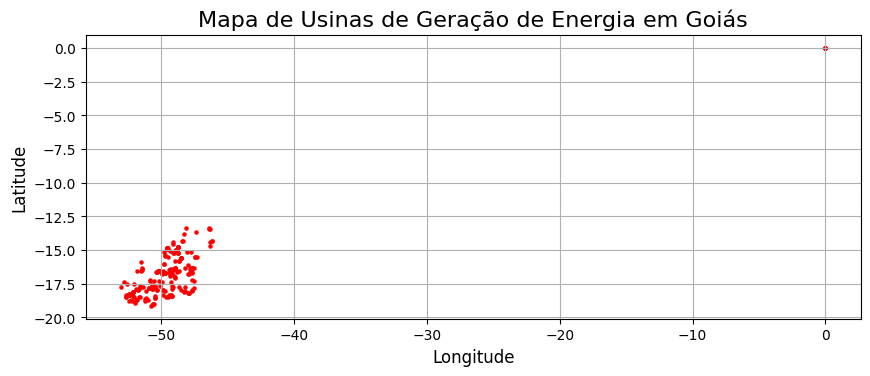

In [10]:
# Célula de Código 5: Criando o primeiro mapa
import geopandas as gpd
import matplotlib.pyplot as plt

# Converter o DataFrame do pandas para um GeoDataFrame
gdf_usinas_goias = gpd.GeoDataFrame(
    df_usinas_goias,
    geometry=gpd.points_from_xy(df_usinas_goias.Longitude, df_usinas_goias.Latitude),
    crs="EPSG:4326"  # Sistema de coordenadas padrão (WGS84)
)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 10))
gdf_usinas_goias.plot(ax=ax, marker='o', color='red', markersize=5)

# Adicionar títulos e rótulos
ax.set_title('Mapa de Usinas de Geração de Energia em Goiás', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

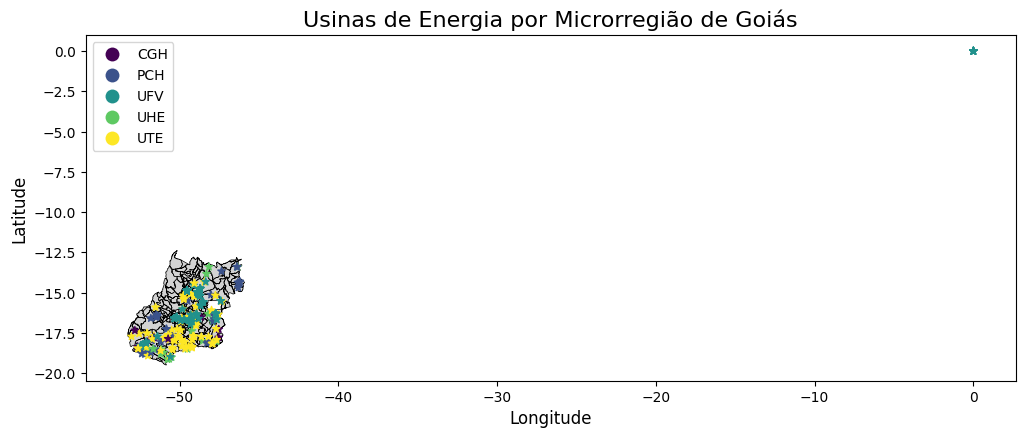

In [15]:
# Célula de Código 6: Carregando e plotando o mapa das microrregiões
# ATENÇÃO: O caminho deve apontar para a pasta que contém o arquivo .shp e seus arquivos auxiliares.
caminho_shapefile_goias = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/GO-MICROREGIOES/' # Exemplo de caminho

# Carregar o shapefile
gdf_microrregioes_goias = gpd.read_file(caminho_shapefile_goias)

# Criar um mapa combinando as microrregiões e as usinas
fig, ax = plt.subplots(figsize=(12, 12))

# 1. Plotar o mapa base das microrregiões
gdf_microrregioes_goias.plot(ax=ax, edgecolor='black', color='lightgray', linewidth=0.5)

# 2. Sobrepor o mapa com a localização das usinas
gdf_usinas_goias.plot(ax=ax, marker='*', column='SigTipoGeracao', markersize=30, legend=True, cmap='viridis')

# Adicionar títulos e rótulos
ax.set_title('Usinas de Energia por Microrregião de Goiás', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()

# Dados Meteriológicos


### Amostra dos Dados Processados ###
                           data hora_utc  precipitacao_mm  pressao_atm_mb  \
datetime                                                                    
2024-01-01 00:00:00  2024/01/01    00:00              NaN             NaN   
2024-01-01 01:00:00  2024/01/01    01:00              NaN           956.7   
2024-01-01 02:00:00  2024/01/01    02:00              NaN             NaN   
2024-01-01 03:00:00  2024/01/01    03:00              NaN           957.1   
2024-01-01 04:00:00  2024/01/01    04:00              NaN           956.4   

                     pressao_max_mb  pressao_min_mb  radiacao_global_kj_m2  \
datetime                                                                     
2024-01-01 00:00:00             NaN             NaN                    NaN   
2024-01-01 01:00:00           956.7           955.7                    0.0   
2024-01-01 02:00:00             NaN             NaN                    NaN   
2024-01-01 03:00:00           9

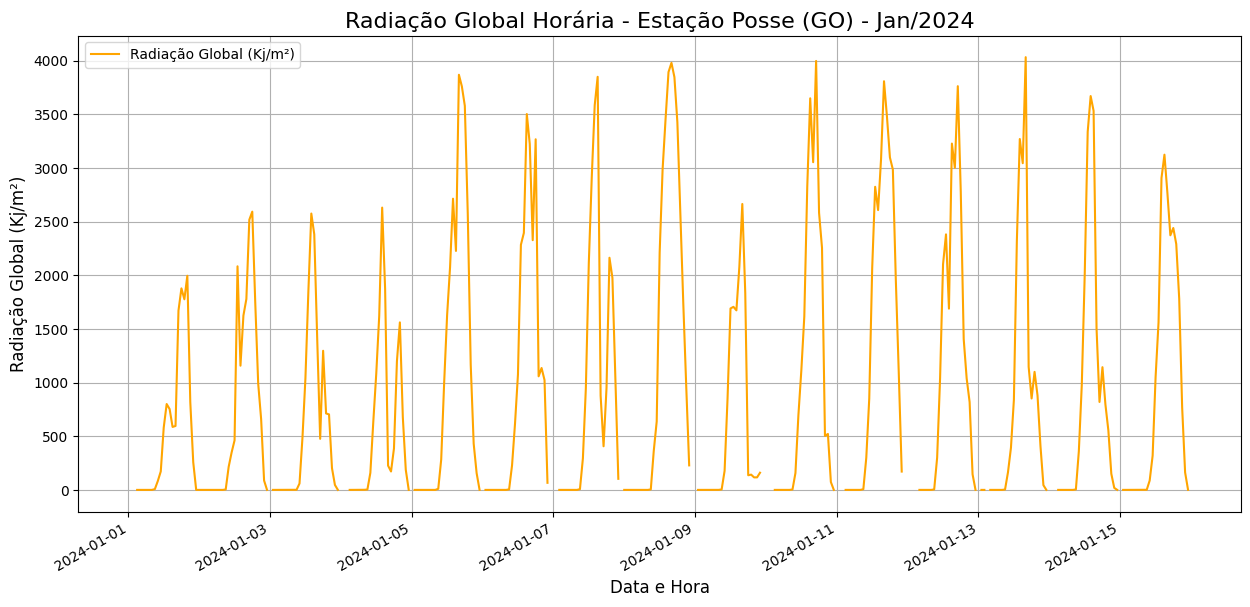

In [19]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- PASSO 1: DEFINA O CAMINHO DO ARQUIVO ---
# Ajuste este caminho para corresponder à localização do seu arquivo no Google Drive
caminho_do_arquivo = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/INMET_CO_GO_A035_ITUMBIARA_01-01-2024_A_31-12-2024.CSV'

try:
    # --- PASSO 2: CARREGAR OS DADOS ---
    # Este comando lê o arquivo CSV, pulando o cabeçalho e tratando os separadores de coluna (;) e decimal (,)
    df_inmet = pd.read_csv(
        caminho_do_arquivo,
        sep=';',
        skiprows=8,
        encoding='latin-1',
        decimal=','
    )


    # --- PASSO 3: LIMPEZA E TRANSFORMAÇÃO ---
    # Remove a última coluna que geralmente é importada vazia
    df_inmet = df_inmet.iloc[:, :-1]

    # Renomeia as colunas para nomes mais curtos e fáceis de usar em Python
    df_inmet.columns = [
        'data', 'hora_utc', 'precipitacao_mm', 'pressao_atm_mb',
        'pressao_max_mb', 'pressao_min_mb', 'radiacao_global_kj_m2',
        'temp_ar_c', 'temp_orvalho_c', 'temp_max_c', 'temp_min_c',
        'temp_orvalho_max_c', 'temp_orvalho_min_c', 'umidade_max_pct',
        'umidade_min_pct', 'umidade_horaria_pct', 'vento_dir_gr',
        'vento_rajada_ms', 'vento_vel_ms'
    ]

    # Combina as colunas 'data' e 'hora_utc' em uma única coluna de data e hora
    df_inmet['hora_utc'] = df_inmet['hora_utc'].str.slice(0, 2) + ':' + df_inmet['hora_utc'].str.slice(2, 4)
    df_inmet['datetime'] = pd.to_datetime(df_inmet['data'] + ' ' + df_inmet['hora_utc'], format='%Y/%m/%d %H:%M')

    # Define a coluna 'datetime' como o índice do DataFrame, o que é ótimo para trabalhar com séries temporais
    df_inmet.set_index('datetime', inplace=True)

    print("\n### Amostra dos Dados Processados ###")
    print(df_inmet.head())

    # --- PASSO 4: ANÁLISE E VISUALIZAÇÃO ---
    print("\nGerando gráfico de Radiação Global para a primeira quinzena de Janeiro de 2024...")

    # Filtra os dados para visualizar apenas as duas primeiras semanas de janeiro
    janeiro_df = df_inmet['2024-01-01':'2024-01-15']

    # Cria a figura e os eixos para o gráfico
    fig, ax = plt.subplots(figsize=(15, 7))

    # Plota a radiação global ao longo do tempo
    ax.plot(janeiro_df.index, janeiro_df['radiacao_global_kj_m2'], label='Radiação Global (Kj/m²)', color='orange')

    # Adiciona títulos e rótulos para clareza
    ax.set_title('Radiação Global Horária - Estação Posse (GO) - Jan/2024', fontsize=16)
    ax.set_xlabel('Data e Hora', fontsize=12)
    ax.set_ylabel('Radiação Global (Kj/m²)', fontsize=12)
    ax.grid(True)
    ax.legend()

    # Melhora a formatação das datas no eixo X para evitar sobreposição
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()

    # Exibe o gráfico
    plt.show()

except FileNotFoundError:
    print("Por favor, verifique se o caminho no Google Drive está correto.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

In [20]:
# Calcular a média diária de radiação
radiacao_media_diaria = df_inmet['radiacao_global_kj_m2'].resample('D').mean()
print(radiacao_media_diaria.head())

datetime
2024-01-01     544.240909
2024-01-02     677.929167
2024-01-03     575.073913
2024-01-04     564.263636
2024-01-05    1106.921739
Freq: D, Name: radiacao_global_kj_m2, dtype: float64


# Dados PIB

Carregando os arquivos

In [22]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# --- PASSO 1: CAMINHOS PARA OS ARQUIVOS (AJUSTE-OS!) ---
caminho_pib_csv = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/PIB/consulta-pib-go.csv'
# Este caminho deve apontar para a pasta que contém o .shp dos MUNICÍPIOS de Goiás
caminho_municipios_shp = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/GO-MICROREGIOES/'

Processando dados PIB

In [23]:
print("Processando arquivo de PIB...")
df_pib_raw = pd.read_csv(caminho_pib_csv, sep=';')

# Filtrar apenas pela variável de interesse
df_pib_filtrado = df_pib_raw[df_pib_raw['Variável'] == 'Produto Interno Bruto a Preços Correntes - PIB (R$ mil)'].copy()

# Transformar de formato largo para longo (pivotar os anos)
df_pib_long = df_pib_filtrado.melt(
    id_vars=['Localidade', 'Variável'],
    var_name='ano',
    value_name='pib_valor_str'
)

# Função para limpar os valores do PIB
def limpar_pib(valor):
    if isinstance(valor, str):
        try:
            valor_limpo = valor.strip().replace('.', '').replace(',', '.')
            return float(valor_limpo)
        except (ValueError, AttributeError):
            return np.nan
    return valor

df_pib_long['pib_mil_reais'] = df_pib_long['pib_valor_str'].apply(limpar_pib)
df_pib_long['Localidade'] = df_pib_long['Localidade'].str.strip()

# Selecionar o ano mais recente para a análise
ano_recente = df_pib_long['ano'].max()
df_pib_recente = df_pib_long[df_pib_long['ano'] == ano_recente]

# Criar o DataFrame final com os dados de PIB limpos
df_pib_final = df_pib_recente[['Localidade', 'pib_mil_reais']].rename(columns={'Localidade': 'NM_MUN'})
df_pib_final.dropna(inplace=True)
print(f"✅ Dados de PIB para o ano de {ano_recente} processados com sucesso!")

Processando arquivo de PIB...


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 18: invalid continuation byte

In [21]:
    # --- PASSO 2: CARREGAR E PROCESSAR OS DADOS DE PIB ---


    # --- PASSO 3: CARREGAR DADOS GEOESPACIAIS DOS MUNICÍPIOS ---
    print("\nCarregando mapa de municípios...")
    gdf_municipios = gpd.read_file(caminho_municipios_shp)
    print("✅ Mapa de municípios de Goiás carregado!")

    # --- PASSO 4: JUNTAR (MERGE) DADOS DE PIB E MAPA ---
    print("\nJuntando dados de PIB com o mapa de municípios...")
    # A junção é feita usando o nome do município ('NM_MUN') como chave
    gdf_municipios_pib = gdf_municipios.merge(df_pib_final, on='NM_MUN', how='left')

    # Verificar se algum município do mapa não encontrou um correspondente no arquivo de PIB
    municipios_sem_pib = gdf_municipios_pib[gdf_municipios_pib['pib_mil_reais'].isnull()]
    if not municipios_sem_pib.empty:
        print(f"⚠️ Atenção: {len(municipios_sem_pib)} municípios não encontraram dados de PIB correspondentes. Isso pode ocorrer por nomes diferentes entre os arquivos.")
        # print(municipios_sem_pib['NM_MUN'].tolist()) # Descomente esta linha para ver os nomes

    print("✅ Junção de dados concluída!")

    # --- PASSO 5: AGREGAR O PIB POR MICRORREGIÃO ---
    print("\nAgregando PIB por microrregião...")
    # Agrupa os municípios pela coluna de nome da microrregião e soma o PIB
    # O nome da coluna da microrregião pode variar (ex: 'NM_MICRO', 'NM_MIC'), verifique no seu shapefile
    # Vamos usar 'NM_MICRO' como exemplo
    pib_por_microrregiao = gdf_municipios_pib.groupby('NM_MICRO')['pib_mil_reais'].sum().reset_index()

    # Carregar o shapefile das MICRORREGIÕES para juntar os dados agregados
    # Assumindo que você já tem o gdf_microrregioes_goias carregado de um passo anterior
    # Se não, carregue-o aqui
    caminho_microrregioes_shp = '/content/drive/MyDrive/Projeto_ONS_Goias/dados/GO_Microrregioes_2020/' # Exemplo
    gdf_microrregioes = gpd.read_file(caminho_microrregioes_shp)

    # Juntar os dados de PIB agregado ao mapa de microrregiões
    gdf_microrregioes_pib = gdf_microrregioes.merge(pib_por_microrregiao, on='NM_MICRO', how='left')
    print("✅ Agregação do PIB por microrregião concluída!")

    # --- PASSO 6: VISUALIZAR O RESULTADO FINAL ---
    print("\nGerando mapa de PIB por microrregião...")
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    gdf_microrregioes_pib.plot(column='pib_mil_reais',
                               ax=ax,
                               legend=True,
                               cmap='BuPu', # Esquema de cores (Azul-Roxo)
                               edgecolor='black',
                               linewidth=0.5,
                               legend_kwds={'label': "PIB Total (R$ mil)",
                                            'orientation': "horizontal"})
    ax.set_title(f'Produto Interno Bruto (PIB) por Microrregião em Goiás ({ano_recente})', fontsize=16)
    ax.set_axis_off() # Remove os eixos de latitude/longitude para um visual mais limpo
    plt.show()

except FileNotFoundError:
    print(f"❌ ERRO: Um dos arquivos não foi encontrado. Verifique os caminhos:")
    print(f"PIB: {caminho_pib_csv}")
    print(f"Municípios: {caminho_municipios_shp}")
except Exception as e:
    print(f"❌ Ocorreu um erro inesperado: {e}")

NameError: name 'media_anual' is not defined